In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "basilicata"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
1,2020-02-26T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
2,2020-02-27T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
3,2020-02-28T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
4,2020-02-29T17:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,32.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2020-11-19T17:00:00,17,Basilicata,147,28,175,4587,4762,258,271,...,2.0,2148.0,2144.0,255.0,16.00,3.67,12.62,12.64,0.00,6.017
269,2020-11-20T17:00:00,17,Basilicata,154,27,181,4762,4943,181,219,...,3.0,2087.0,2091.0,175.0,14.92,3.66,10.49,10.47,-3.57,4.599
270,2020-11-21T17:00:00,17,Basilicata,157,24,181,4989,5170,227,260,...,6.0,1686.0,1684.0,227.0,13.26,3.50,15.42,15.44,-11.11,5.260
271,2020-11-22T17:00:00,17,Basilicata,156,23,179,5153,5332,162,208,...,0.0,1540.0,1751.0,164.0,12.85,3.36,13.51,11.88,-4.17,4.023


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 23, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 58
Nuovi tamponi: 383.0
Percentuale nuovi positivi/nuovi tamponi: 15.1 %
Nuovi guariti: 14.0
Nuovi deceduti: 4.0
Variazione positivi ricoverati con sintomi: 1.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: 39.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 23, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-24T17:00:00,17,Basilicata,13,1,14,182,196,4,9,...,0.0,746.0,746.0,3.0,7.14,7.14,1.21,1.21,0.00,4.688
1,2020-09-25T17:00:00,17,Basilicata,13,1,14,191,205,9,13,...,0.0,850.0,850.0,9.0,7.14,6.83,1.53,1.53,0.00,6.633
2,2020-09-26T17:00:00,17,Basilicata,14,1,15,214,229,24,25,...,0.0,830.0,830.0,23.0,6.67,6.55,3.01,3.01,0.00,12.195
3,2020-09-27T17:00:00,17,Basilicata,13,1,14,252,266,37,47,...,1.0,519.0,519.0,38.0,7.14,5.26,9.06,9.06,0.00,20.524
4,2020-09-28T17:00:00,17,Basilicata,13,1,14,259,273,7,7,...,0.0,186.0,186.0,7.0,7.14,5.13,3.76,3.76,0.00,2.632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-19T17:00:00,17,Basilicata,147,28,175,4587,4762,258,271,...,2.0,2148.0,2144.0,255.0,16.00,3.67,12.62,12.64,0.00,6.017
57,2020-11-20T17:00:00,17,Basilicata,154,27,181,4762,4943,181,219,...,3.0,2087.0,2091.0,175.0,14.92,3.66,10.49,10.47,-3.57,4.599
58,2020-11-21T17:00:00,17,Basilicata,157,24,181,4989,5170,227,260,...,6.0,1686.0,1684.0,227.0,13.26,3.50,15.42,15.44,-11.11,5.260
59,2020-11-22T17:00:00,17,Basilicata,156,23,179,5153,5332,162,208,...,0.0,1540.0,1751.0,164.0,12.85,3.36,13.51,11.88,-4.17,4.023


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

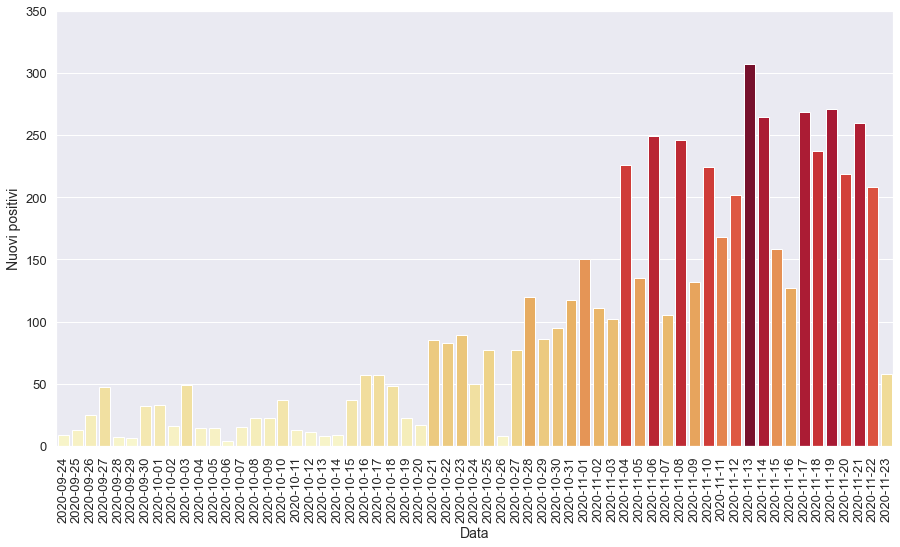

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

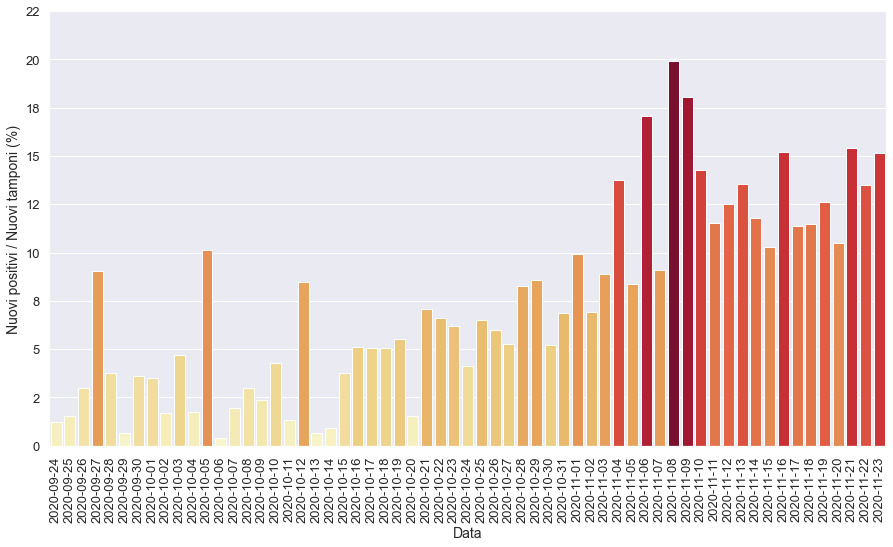

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

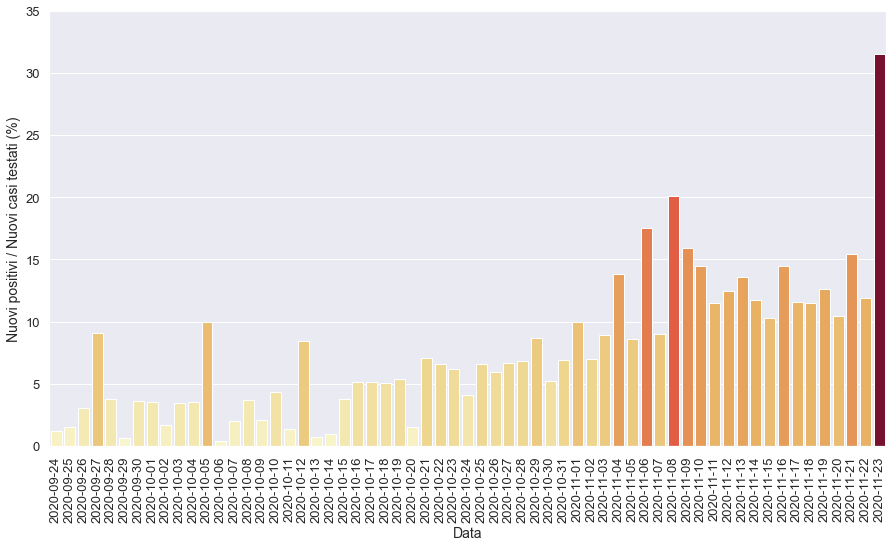

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

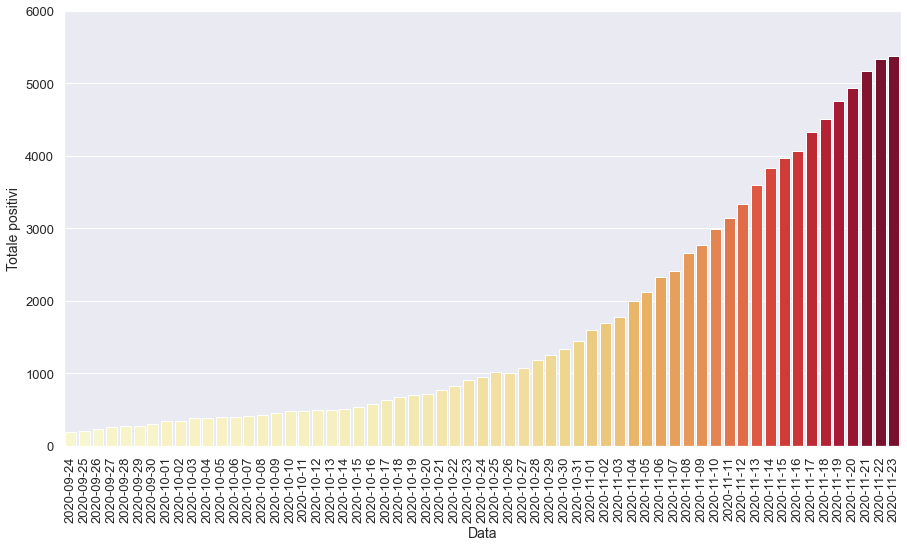

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

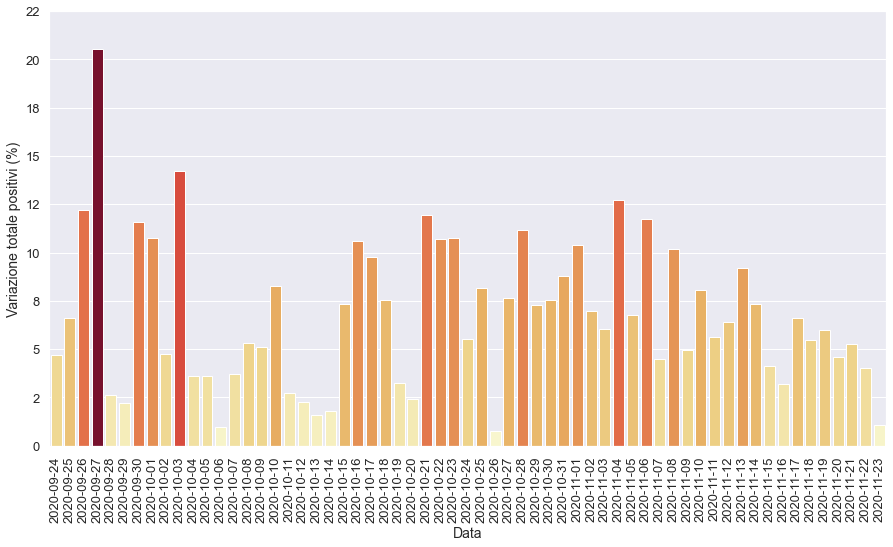

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

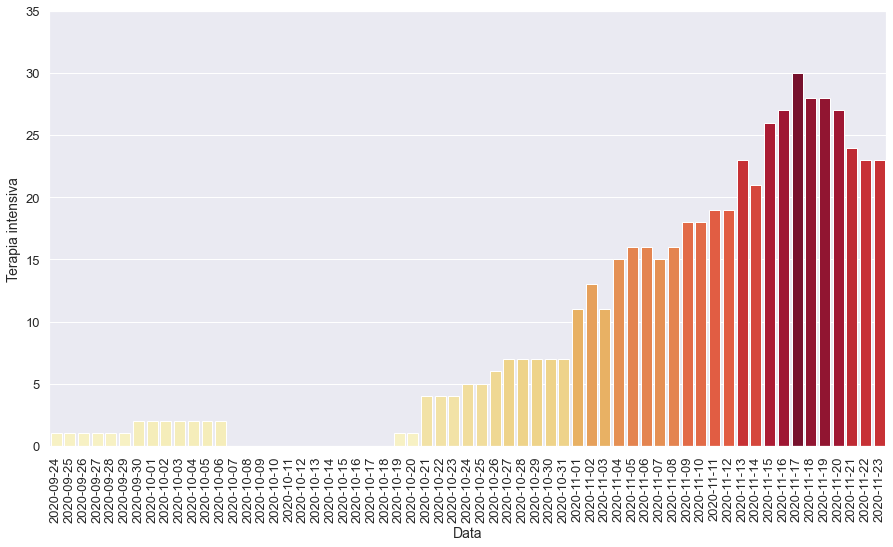

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

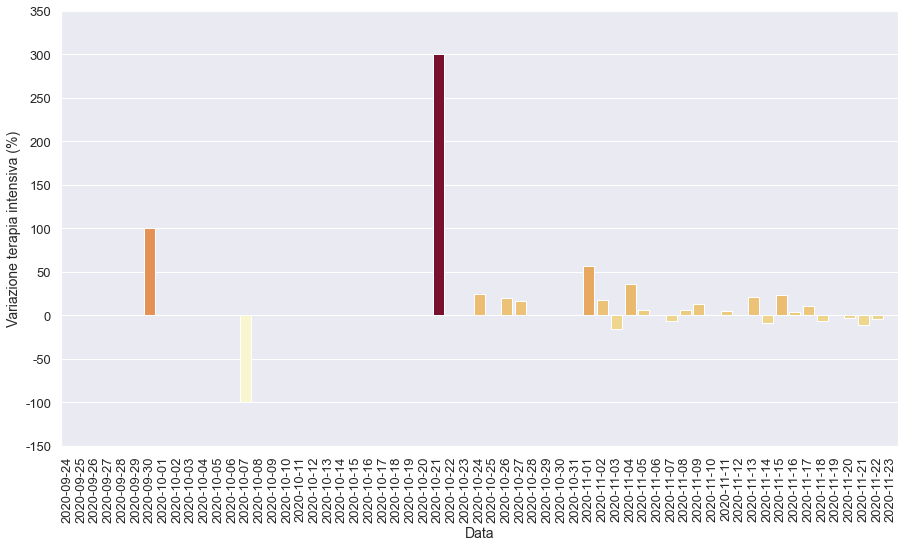

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

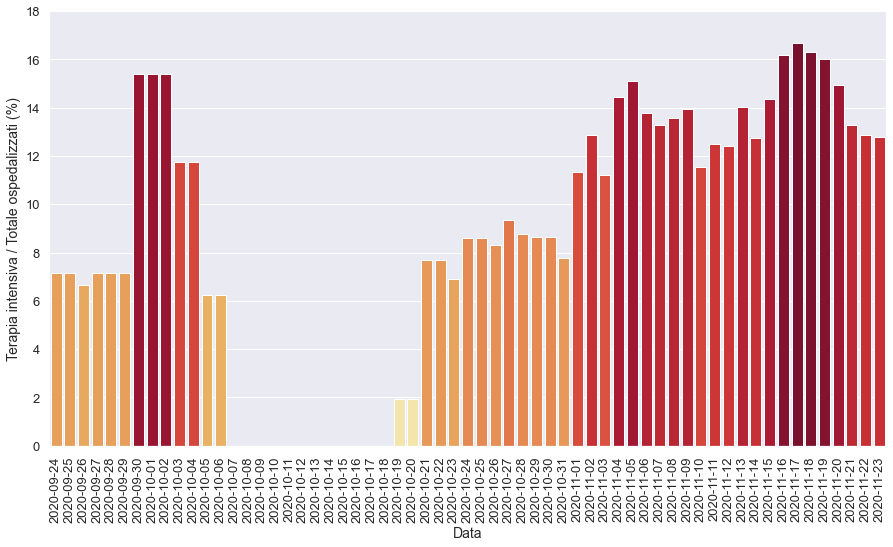

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

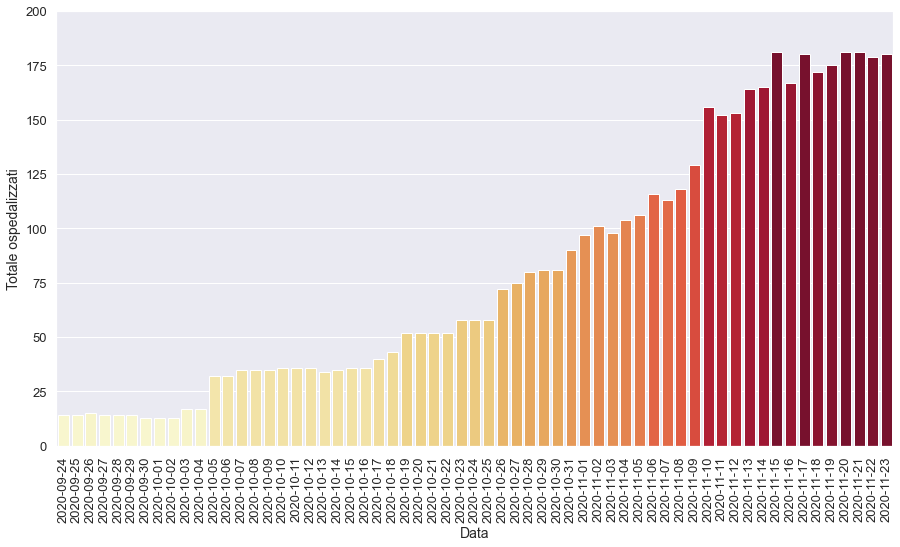

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

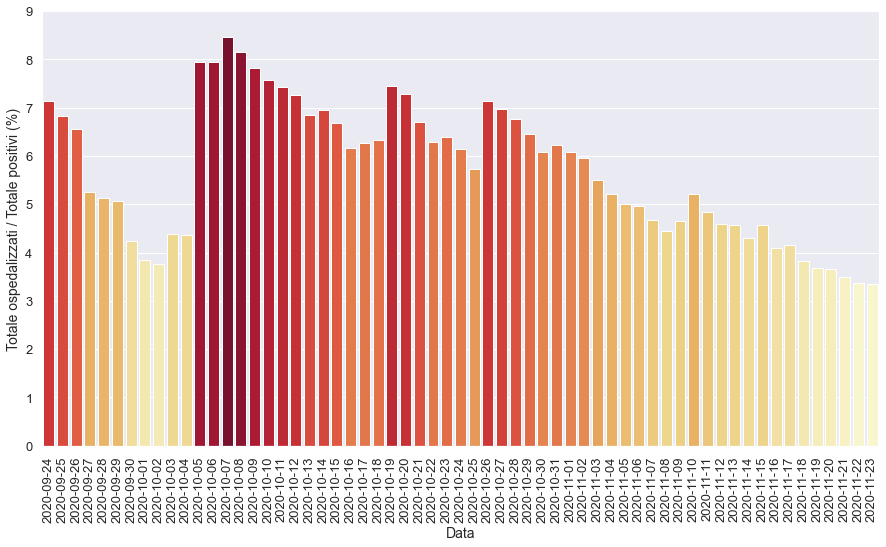

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

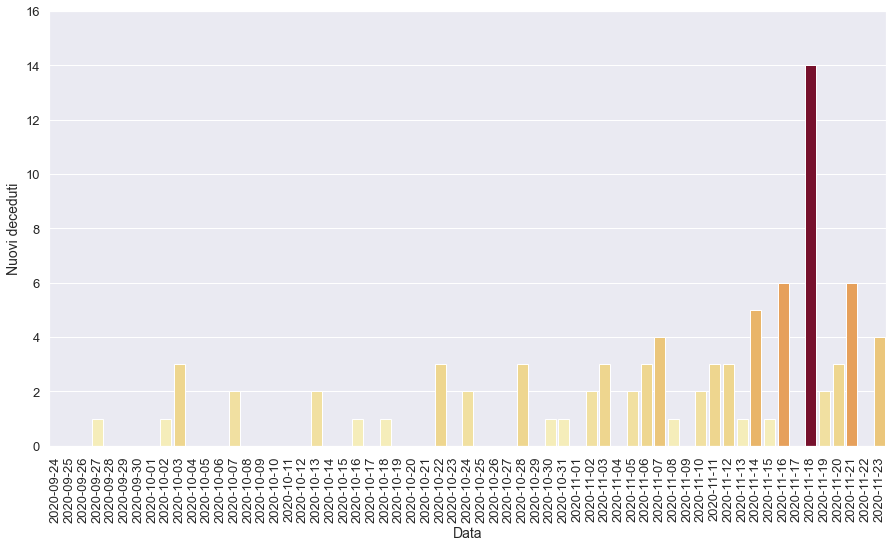

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

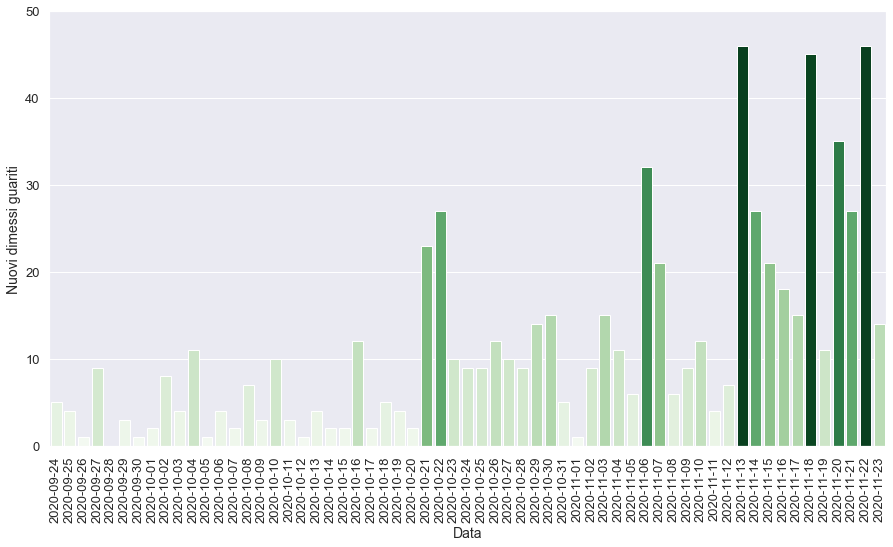

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-24T17:00:00,17,Basilicata,53,5,58,887,945,38,50,...,2.0,1214.0,1214.0,38.0,8.62,6.14,4.12,4.12,25.00,5.519
1,2020-10-25T17:00:00,17,Basilicata,53,5,58,955,1013,68,77,...,0.0,1181.0,1172.0,68.0,8.62,5.73,6.52,6.57,0.00,8.148
2,2020-10-26T17:00:00,17,Basilicata,66,6,72,937,1009,-4,8,...,0.0,134.0,134.0,-18.0,8.33,7.14,5.97,5.97,20.00,0.790
3,2020-10-27T17:00:00,17,Basilicata,68,7,75,1001,1076,67,77,...,0.0,1459.0,1158.0,64.0,9.33,6.97,5.28,6.65,16.67,7.631
4,2020-10-28T17:00:00,17,Basilicata,73,7,80,1104,1184,108,120,...,3.0,1451.0,1761.0,103.0,8.75,6.76,8.27,6.81,0.00,11.152
5,2020-10-29T17:00:00,17,Basilicata,74,7,81,1175,1256,72,86,...,0.0,1004.0,994.0,71.0,8.64,6.45,8.57,8.65,0.00,7.264
6,2020-10-30T17:00:00,17,Basilicata,74,7,81,1254,1335,79,95,...,1.0,1826.0,1826.0,79.0,8.64,6.07,5.20,5.20,0.00,7.564
7,2020-10-31T17:00:00,17,Basilicata,83,7,90,1356,1446,111,117,...,1.0,1703.0,1693.0,102.0,7.78,6.22,6.87,6.91,0.00,8.764
8,2020-11-01T17:00:00,17,Basilicata,86,11,97,1498,1595,149,150,...,0.0,1511.0,1511.0,142.0,11.34,6.08,9.93,9.93,57.14,10.373
9,2020-11-02T17:00:00,17,Basilicata,88,13,101,1594,1695,100,111,...,2.0,1605.0,1598.0,96.0,12.87,5.96,6.92,6.95,18.18,6.959


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

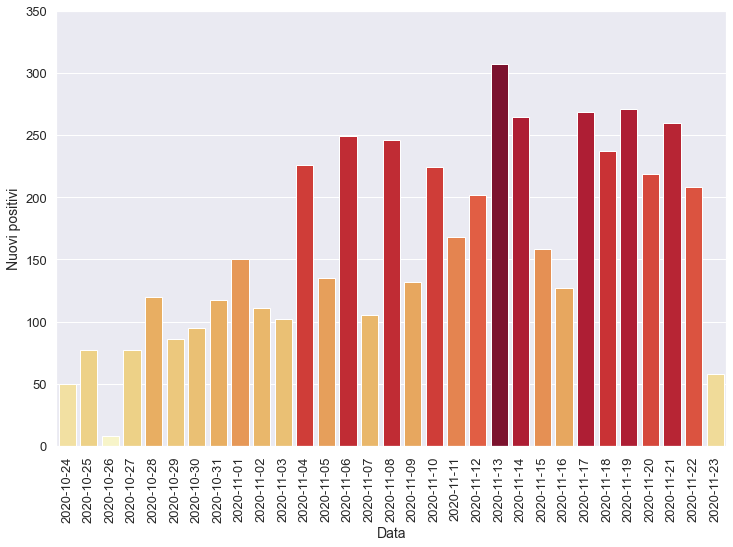

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

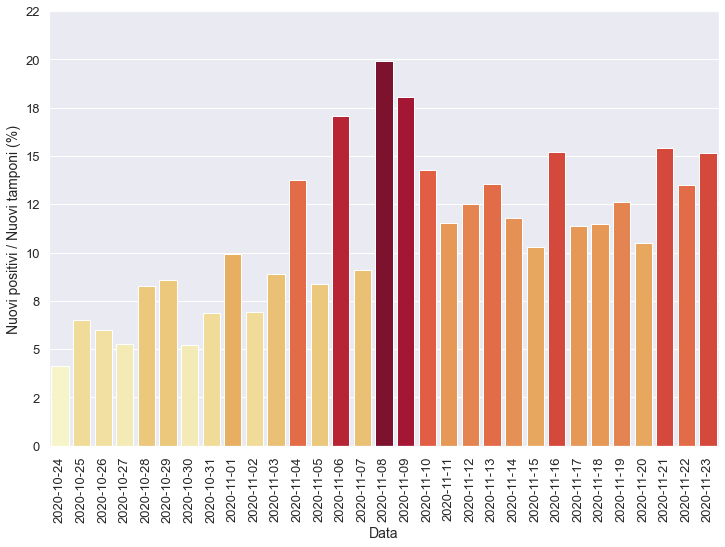

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

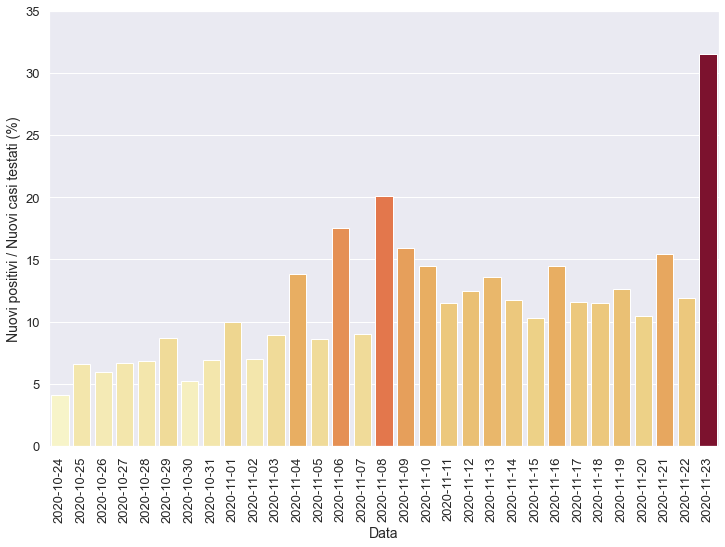

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

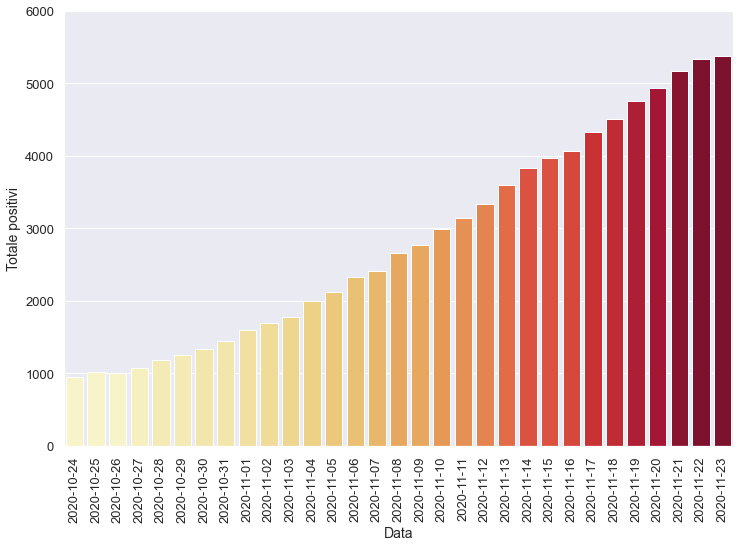

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

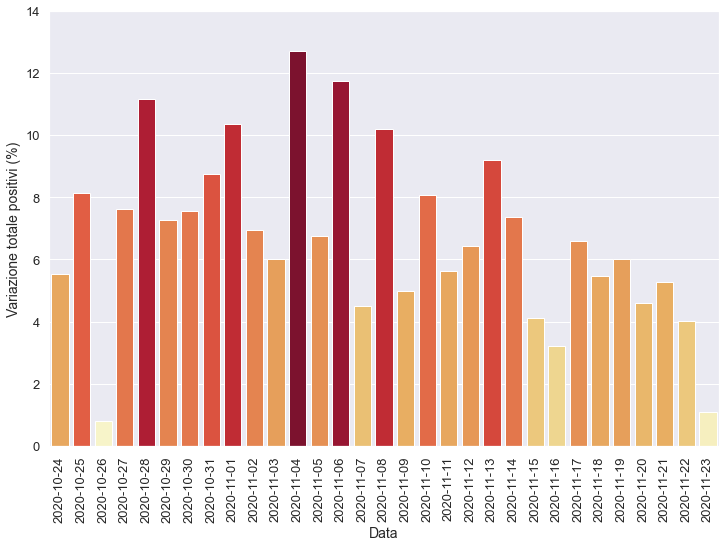

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

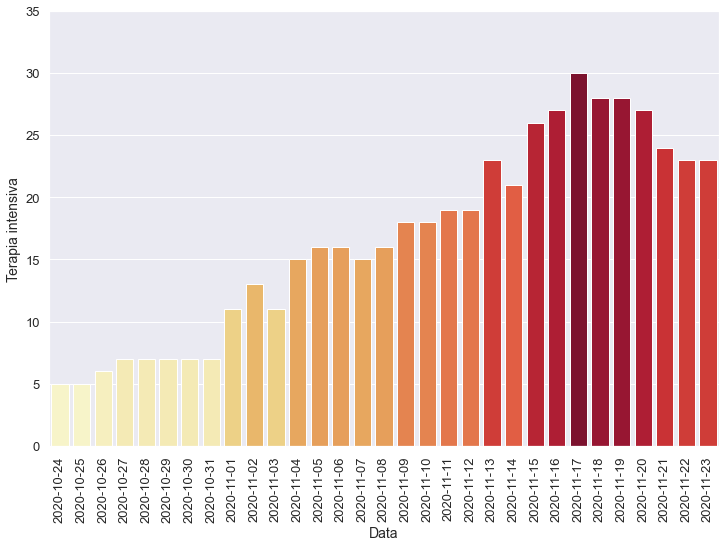

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

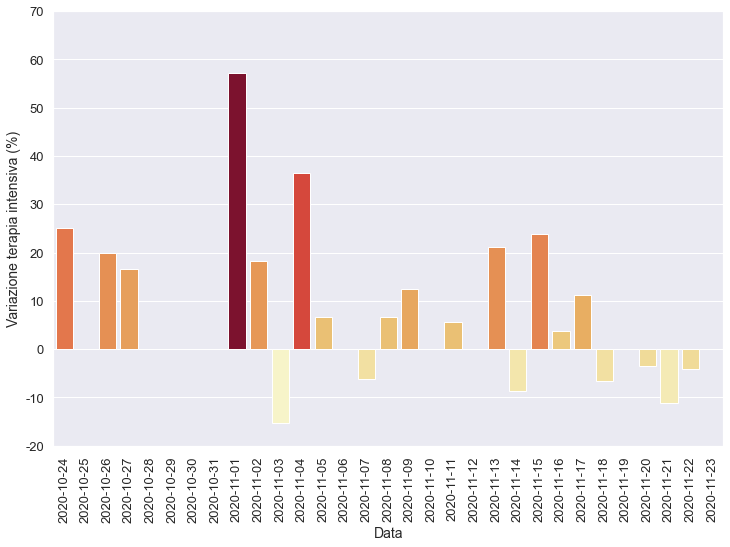

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

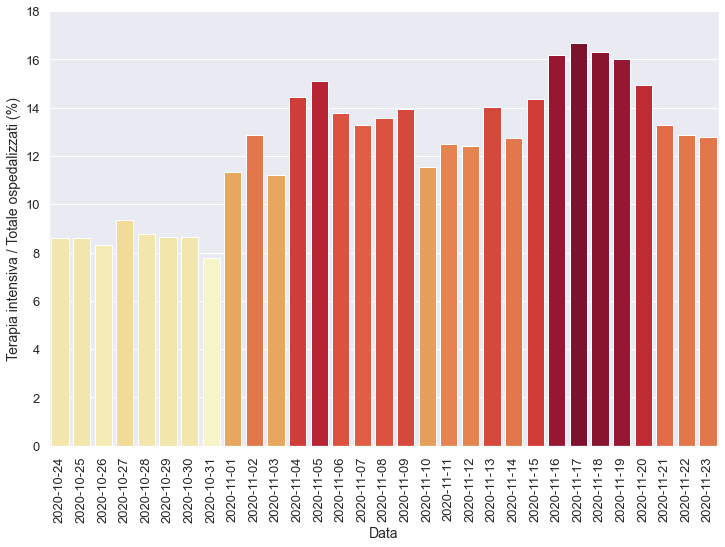

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

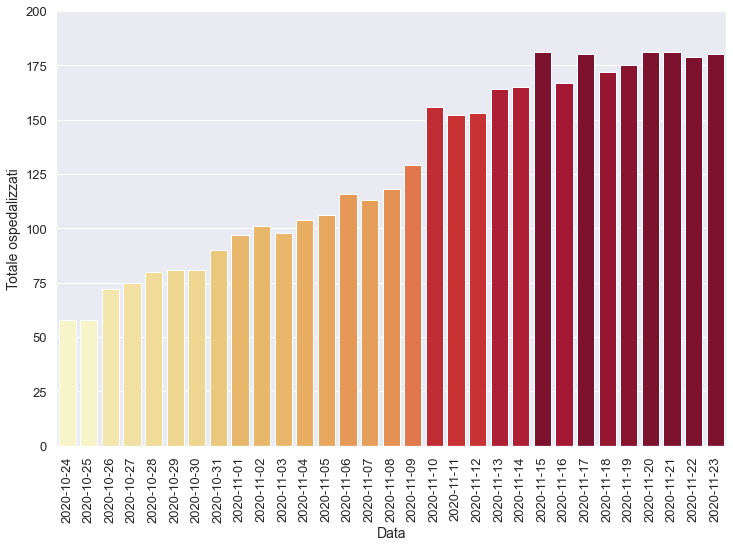

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

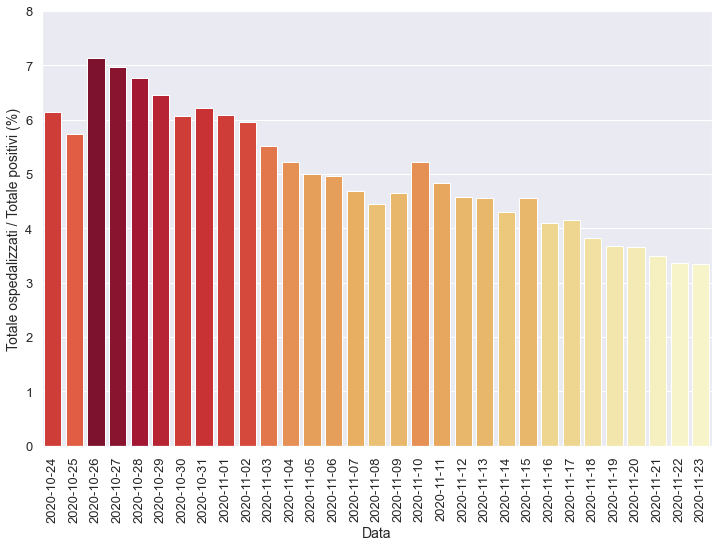

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

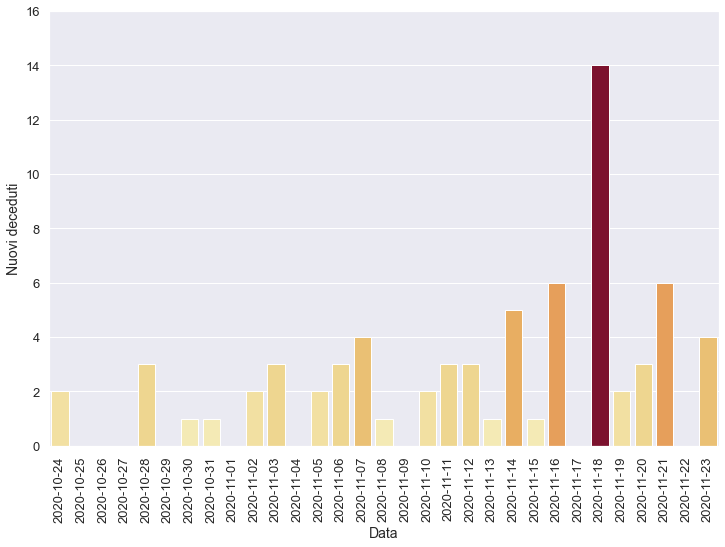

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

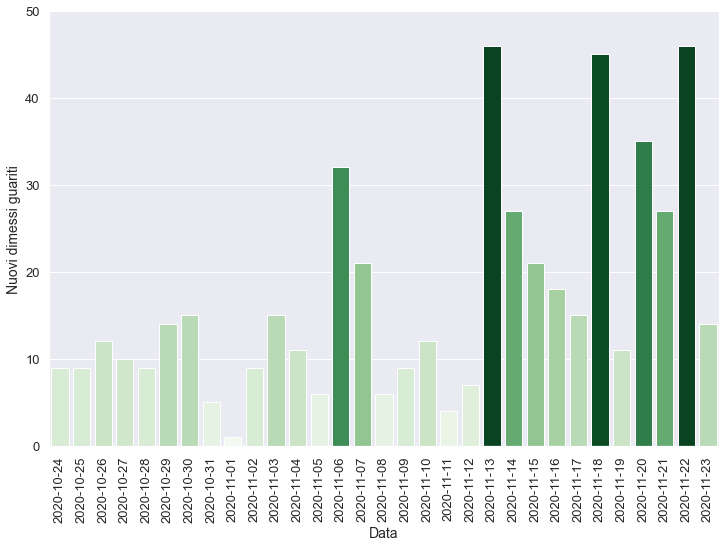

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-16T17:00:00,17,Basilicata,140,27,167,3905,4072,103,127,...,6.0,836.0,876.0,117.0,16.17,4.10,15.19,14.50,3.85,3.200
1,2020-11-17T17:00:00,17,Basilicata,150,30,180,4146,4326,254,269,...,0.0,2371.0,2331.0,241.0,16.67,4.16,11.35,11.54,11.11,6.606
2,2020-11-18T17:00:00,17,Basilicata,144,28,172,4332,4504,178,237,...,14.0,2061.0,2056.0,186.0,16.28,3.82,11.50,11.53,-6.67,5.479
3,2020-11-19T17:00:00,17,Basilicata,147,28,175,4587,4762,258,271,...,2.0,2148.0,2144.0,255.0,16.00,3.67,12.62,12.64,0.00,6.017
4,2020-11-20T17:00:00,17,Basilicata,154,27,181,4762,4943,181,219,...,3.0,2087.0,2091.0,175.0,14.92,3.66,10.49,10.47,-3.57,4.599
5,2020-11-21T17:00:00,17,Basilicata,157,24,181,4989,5170,227,260,...,6.0,1686.0,1684.0,227.0,13.26,3.50,15.42,15.44,-11.11,5.260
6,2020-11-22T17:00:00,17,Basilicata,156,23,179,5153,5332,162,208,...,0.0,1540.0,1751.0,164.0,12.85,3.36,13.51,11.88,-4.17,4.023
7,2020-11-23T17:00:00,17,Basilicata,157,23,180,5192,5372,40,58,...,4.0,383.0,184.0,39.0,12.78,3.35,15.14,31.52,0.00,1.088


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

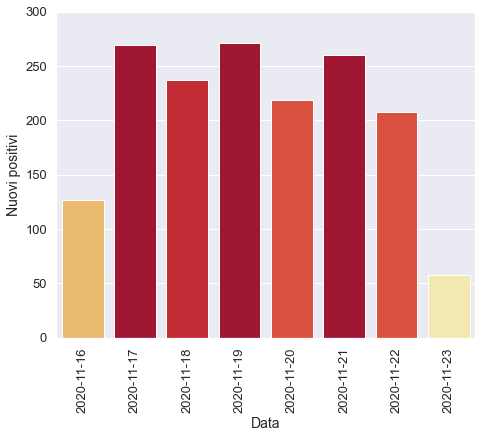

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

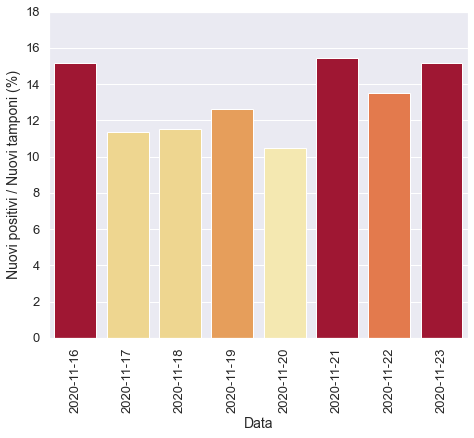

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

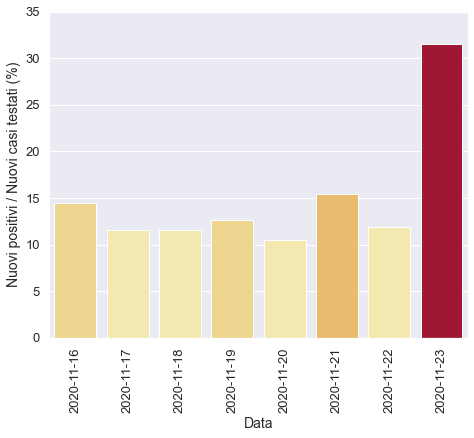

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

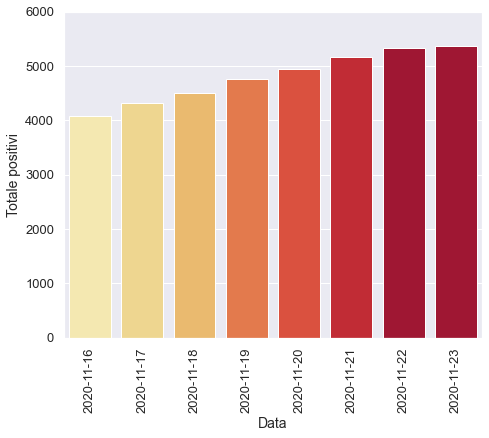

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

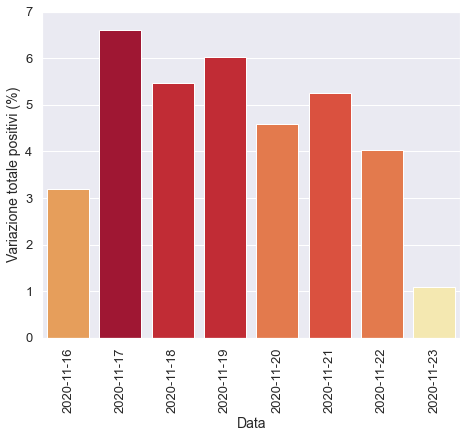

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

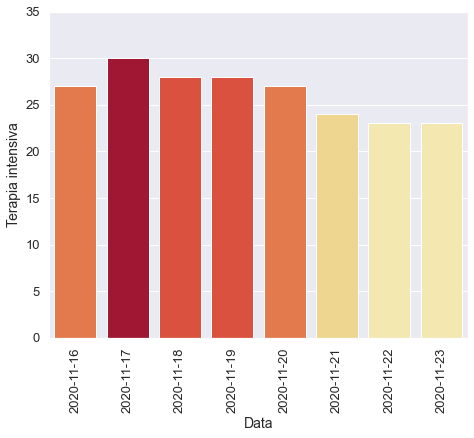

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

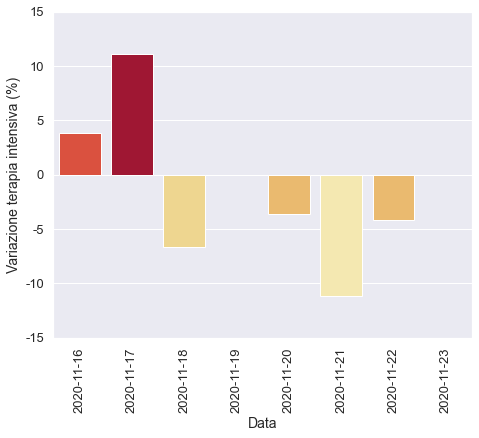

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

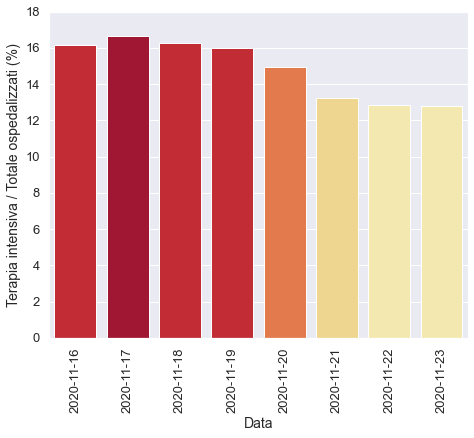

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

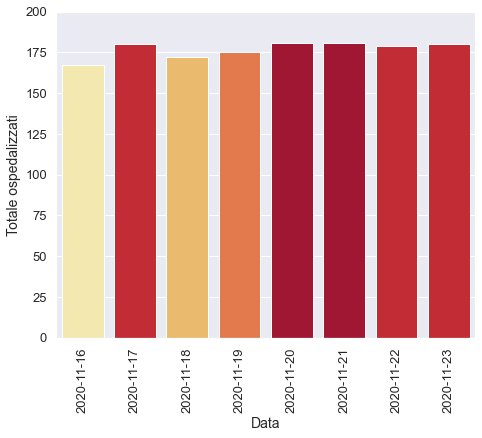

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

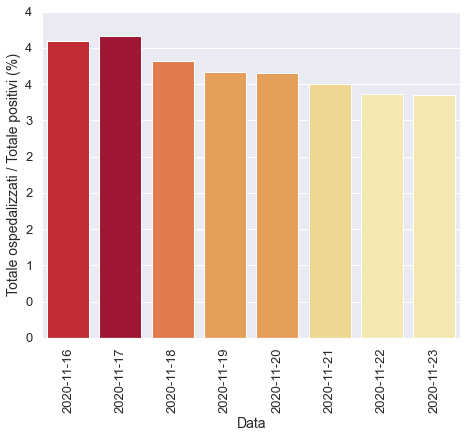

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

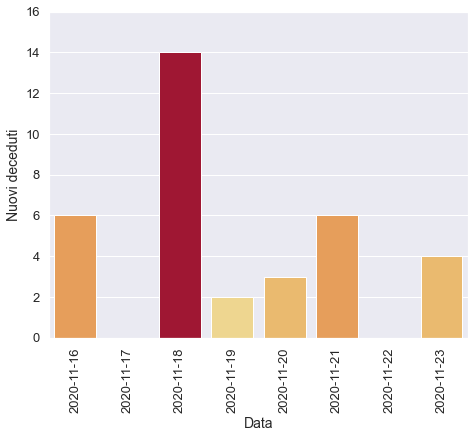

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

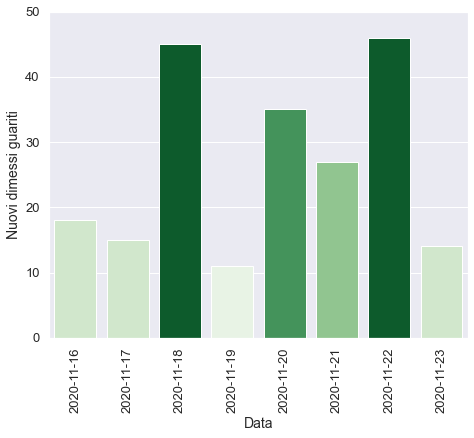

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)